# Basic data analysis

You will learn how to **combine** (join and concatenate) datasets, **download online datasets** (throguh an API), and use **split-apply-combine** to calculate group-level statistics and make group-level plots.


# Introduction

## Setup

In [1]:
import pandas as pd
import numpy as np

**Venn diagrams:** To draw beautiful Venn diagrams, run `pip install matplotlib-venn` and get access to `matplotlib_venn`. If you do not have that package or don't want to use it, just ignore those cells. 

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

## Concepts

When **combining datasets**, there are a few crucial concepts: 

* **Concatenate (append)**: "stack" rows (observations) on top of each other. This works if there are the same columns (variables) in both datasets. 
* **Merge**: the two datasets have different variables but may or may not have the same observations. There are different kinds of merges depending on which observations you want to keep. Whenever we include a row not in both datasets, the variables will be missing if they are not in the corresponding contributing dataset. 
    
    * **Outer join (one-to-one)** The intersection of the two datasets, i.e. keep observations in either or both datasets. Also called *full outer join* in SQL. 
    * **Inner join (one-to-one)** Keep only observations that are in both. 
    * **Left join (many-to-one)** Keep only observations that are in the left dataset or in both datasets. 
    * **Cartesian join (many-to-many)** This is almost surely never what you want. 

**Fetching data from an API**. An API is an interface through which we can directly ask for and receive data from an online source. We will be using packages for this and will not look at what is going on underneath. 

* We use `pandas_datareader` to access many common international online data sources (install with `pip install pandas-datareader`)
* For Statistics Denmark, Jakob Elben has written the `pydst` package (install with `pip install git+https://github.com/elben10/pydst`)

When working with data, we will look at the notion of **split-apply-combine**: 

* **Split** the data into sub-datasets based on e.g. an ID or time variable, 
* **Apply** a function to each sub-dataset, 
* **Combine** sub-datasets back together. 

# Combining datasets (merging and concatenating)

In this section, we will be combining datasets in different ways.

In [3]:
empl = pd.read_csv('../06/data/RAS200_tall.csv') # .. -> means one folder up

In [4]:
inc = pd.read_csv('../06/data/INDKP107_tall.csv')

In [5]:
area = pd.read_csv('../06/data/area.csv')

## Concatenating datasets

Suppose we have two datasets that have the same variables and we just want to concatenate them. 

In [6]:
empl.head(3)

,municipality,year,e
0,København,2008,72.5
1,Frederiksberg,2008,75.6
2,Dragør,2008,80.5


In [7]:
N = empl.shape[0]
A = empl.loc[empl.index < N/2,:]
B = empl.loc[empl.index >= N/2,:]

print(f'A has shape {A.shape} ')
print(f'B has shape {B.shape} ')

A has shape (446, 3) 
B has shape (445, 3) 


Concatenation is done simply using the command `pd.concat([df1, df2])`. 

In [8]:
C = pd.concat([A,B])
print(f'C has shape {C.shape} (same as the original empl, {empl.shape})')

C has shape (891, 3) (same as the original empl, (891, 3))


## Merging datasets

We now consider two dataframes that have different *variables*: `empl` and `inc`. For all the merges, we will use the command `pd.merge(empl, inc, on=[municipalitiy, year], how=X)`. The keyword `on` specifies the *merge key(s)*. They must be unique in at least one of the contributing datasets, but merges are easiest to understand when they uniquely identify observations in both datasets.  

The `how` keyword (taking values `'left'`, `'right'`, `'outer'`, `'inner'`) relates to what we want pandas to do if the observations in the two datasets are different, which they are in our case. We can for example look at the years and the number of unique regions by using the command `df.var.unique()`, which returns the list of unique values that the variable attains: 

In [9]:
empl.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [10]:
inc.year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [11]:
print(f'Municiaplities in empl = {len(empl.municipality.unique())}')
print(f'Municiaplities in inc  = {len(inc.municipality.unique())}')

Municiaplities in empl = 99
Municiaplities in inc  = 98


In [12]:
mun_emp = empl.municipality.unique()
mun_inc = inc.municipality.unique()

# list of municipalities in mun_emp that are not in mun_inc
diff = [muni for muni in mun_emp if muni not in mun_inc] 

print(f'Municipalities in empl data but not in inc data: {diff}')

Municipalities in empl data but not in inc data: ['Christiansø']


**Conclusion:** `inc` has more years than `empl`, but `empl` has one municipality that is not in `inc`. 

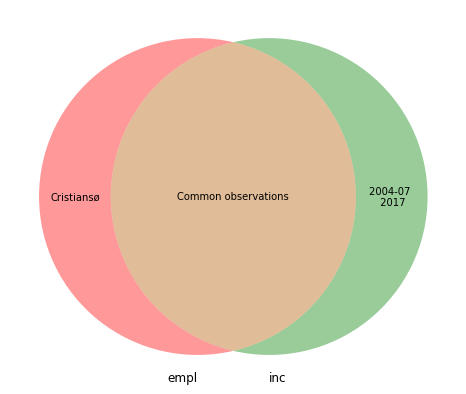

In [13]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('Cristiansø')
v.get_label_by_id('010').set_text('2004-07 \n 2017' )
v.get_label_by_id('110').set_text('Common observations')
plt.show()

### Outer join: union

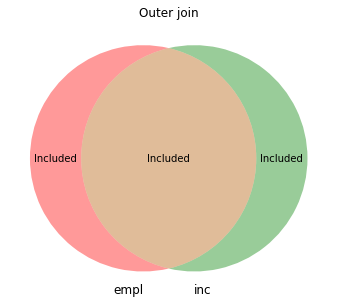

In [14]:
plt.figure(figsize=(10,5))
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('Included')
v.get_label_by_id('010').set_text('Included')
v.get_label_by_id('110').set_text('Included')
plt.title('Outer join')
plt.show()

In [15]:
both_outer = pd.merge(empl,inc,how='outer',on=['municipality','year'])

print(f'Number of municipalities = {len(both_outer.municipality.unique())}')
print(f'Number of years          = {len(both_outer.year.unique())}')

Number of municipalities = 99
Number of years          = 14


In [16]:
I = (both_outer.year == 2017) | (both_outer.municipality == 'Christiansø')
both_outer.loc[I, :].head(15)

,municipality,year,e,inc
29,Christiansø,2008,62.9,NaN
128,Christiansø,2009,64.6,NaN
227,Christiansø,2010,67.8,NaN
326,Christiansø,2011,67.7,NaN
425,Christiansø,2012,69.6,NaN
524,Christiansø,2013,69.4,NaN
623,Christiansø,2014,70.0,NaN
722,Christiansø,2015,75.5,NaN
821,Christiansø,2016,77.8,NaN
1283,København,2017,NaN,333579.0


We see that the **outer join** includes rows that exist in either dataframe and therefore includes missing values. 

### Inner join

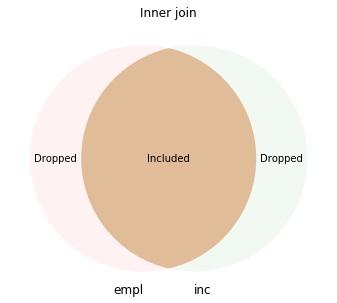

In [17]:
plt.figure(figsize=(10,5))
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('Dropped'); v.get_patch_by_id('100').set_alpha(0.05)
v.get_label_by_id('010').set_text('Dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('Included')
plt.title('Inner join')
plt.show()

In [18]:
both_inner = pd.merge(empl,inc,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(both_inner.municipality.unique())}')
print(f'Number of years          = {len(both_inner.year.unique())}')

Number of municipalities = 98
Number of years          = 9


In [19]:
I = (both_inner.year == 2017) | (both_inner.municipality == 'Christiansø')
both_inner.loc[I, :].head(15)

,municipality,year,e,inc


We see that the **inner join** does not contain any rows that are not in both dataframes. 

### Left join

In my work, I most frequently use the **left join**. It is also known as a *many-to-one* join. 
* **Left dataset:** `both_outer` many observations of a given municipality (one per year),
* **Right dataset:** `area` at most one observation per municipality and new variables (area). 

It is also applicable if you have, say, a dataset of transactions with customer ID and you have a different dataset with customers and their Facebook ID. Then your **left** frame would be transactions (with many rows per customer) and your **right** frame would have precisely one row per customer. 

**Venn diagram:** The left join includes all observations in the left dataframe. It will not drop rows where the right dataframe does not exist and, and it will not add rows in the right frame if they are not in the left frame. 

**Our setting:** To use the join, we want first the left frame to contain all the rows that should be in our final dataset. We will call the left dataset `munis`. To create it, we will need these convenient functions: 
* `df.drop_duplicates()`: Drops duplicate rows in terms of *all* variables, 
* `df.append()`: Simple concatenation (it just adds the row for one dataframe below the rows for another. 

In [20]:
print(f'both_inner has shape {both_inner.shape}')
print(f'area has shape {area.shape}')

both_with_area = pd.merge(both_inner, area, on='municipality', how='left')
print(f'merge result has shape {both_with_area.shape}')

both_inner has shape (882, 4)
area has shape (99, 2)
merge result has shape (882, 5)


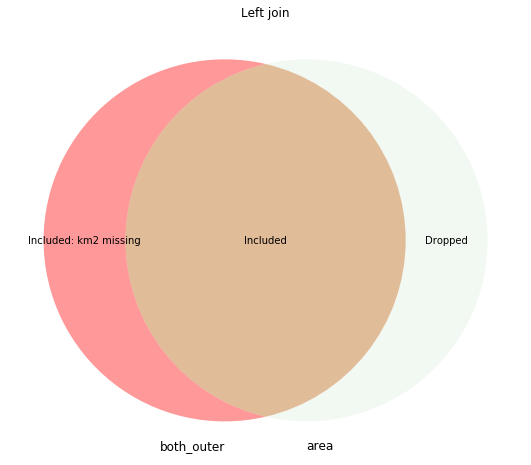

In [21]:
plt.figure(figsize=(15,8))
v = venn2(subsets = (4, 4, 10), set_labels = ('both_outer', 'area'))
v.get_label_by_id('100').set_text('Included: km2 missing'); 
v.get_label_by_id('010').set_text('Dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('Included')
plt.title('Left join')
plt.show()

#### Intermezzo: finding the non-overlapping observations

In [22]:
print(f'There are {area.municipality.unique().shape[0]} municipalities in area.')

munis_not_in_area       = [m for m in both_inner.municipality.unique() if m not in area.municipality.unique()]
munis_not_in_both_inner = [m for m in area.municipality.unique()       if m not in both_inner.municipality.unique()]

print(f'There are {len(munis_not_in_area)} municipalities in both_inner that are not in area. They are:')
print(munis_not_in_area)

print(f'There is {len(munis_not_in_both_inner)} municipalities in area that are not in both_inner. They are:')
print(munis_not_in_both_inner)

There are 99 municipalities in area.
There are 0 municipalities in both_inner that are not in area. They are:
[]
There is 1 municipalities in area that are not in both_inner. They are:
['Christiansø']


#### Alternative function for left joins: `df.join`

To use a left join function `df.join()`, we must first set the index. Technically, we do not need this, but if you ever need to join on more than one variable, `df.join()` requires you to work with indices so we might as well learn it now. 

In [23]:
both_outer = both_outer.set_index('municipality')
area = area.set_index('municipality')

In [24]:
print(both_outer.shape)
print(area.shape)

(1381, 3)
(99, 1)


In [25]:
print(f'Before, both_outer has shape: {both_outer.shape}')
final = both_outer.join(area)
print(f'Final has shape: {final.shape}')

# after we are done, we can reset the index
final = final.reset_index()
final.head(4)

Before, both_outer has shape: (1381, 3)
Final has shape: (1381, 4)


,municipality,year,e,inc,km2
0,Aabenraa,2008,74.6,308611.0,940.7
1,Aabenraa,2009,71.6,308226.0,940.7
2,Aabenraa,2010,70.9,350112.0,940.7
3,Aabenraa,2011,70.2,346564.0,940.7


We see that no rows were added (1381 rows both before and after the join). Moreover, rows that were in left frame (`both_outer`) but not in the right (`area`) were kept but will have missing values for the new variables coming from left (area). This is a good way of illustrating a new command: 
* `df.var.isin(LIST)`: returns a list of integers as long as `df.var` with each element being true if `var` is in the list `LIST` for that row. 

In [26]:
I = final.municipality.isin(munis_not_in_area)
if I.any():
    final.loc[I, :].sample(8)

We can compute the share of all the rows that have missings by using the following function: 
* `df.var.notnull()`: returns a list of logical variables that are true when the variable is not missing 
* `df.var.mean()`: computes the mean of a variable 

We can combine the two to do our calculation in one step: 

In [27]:
final.km2.notnull().mean()

1.0

## Other programming languages 

### SQL (including SAS proc sql)

SQL is one of the most powerful database languages and many other programming languages embed a version of it. For example, SAS has the Proc SQL, where you can use SQL syntax. 

SQL is written in statements such as 
* **left join**   `select * from empl left join inc on empl.municipality = inc.municipality and empl.year = inc.year`
* **outer join** `select * from empl full outer join inc on empl.municipality = inc.municipality and empl.year = inc.year`

### Stata

In Stata, the command `merge` nests many of the commands mentioned above. You specify `merge 1:1`  for a one-to-one merge or `merge m:1`  or `merge 1:m`  for many-to-one or one-to-many merges, and you do not use `merge m:m` (until you are quite advanced). 

By default, Stata then keeps any variable in either of the two datasets and creates a dummy variable informing you where the individual rows come from. 



# Fetching data using an API

API stands for Application Programming Interface. In the context of data sources, it is a protocol for communication with a database. Essentially, it is the language that we can use in Python to speak to a source, e.g. Statistics Denmark, and directly receive data without the need to go to their website, download data in Excel format, convert it to python-readable, etc. 

Fetching data from an API requires an internet connection and works directly without saving data to your HDD (unless you ask Python to do so afterwards). You can use it to automate tasks such as fetching the most recent data, doing some calculations and outputting it in the same manner. This can be useful e.g. for quarterly reports. 

**Pros:** Automatic; smart; everything is done from Python (so no need to remember steps in between). 

**Cons:** The connection can be slow or drop out, which may lead to errors. If e.g. 100 students simultaneously fetch data (during, say, a lecture), the host server may not be able to service all the requests and may drop out. 

The raw output data from an API could look like this: https://stats.oecd.org/SDMX-JSON/data/NAAG. It is a log list of non-human-readable gobledygook in the so-called "JSON" format. 

**Import the packages** we need. If you do not have `pandas_datareader`, install it by typing in a terminal: 
> `pip install pandas-datareader`

In [28]:
import pandas_datareader
import datetime

In [29]:
# This should work in principle, but the OECD server takes *AGES* to respond... 
# To test whether you have the right table, use https://stats.oecd.org/SDMX-JSON/data/NAMEOFTALBE, e.g. https://stats.oecd.org/SDMX-JSON/data/NAAG
# dat = pandas_datareader.data.DataReader('NAAG','oecd')

## pydst (Statistics Denmark)

To install, open a terminal and run the command: `pip install git+https://github.com/elben10/pydst`

In [30]:
import pydst

In [31]:
Dst = pydst.Dst(lang='da')

The command `Dst.get_subjects()` provides a list of all the top-level subjects that data falls under

In [32]:
Dst.get_subjects()

,active,desc,hasSubjects,id
0,True,Befolkning og valg,True,02
1,True,Levevilkår,True,05
2,True,Uddannelse og viden,True,03
3,True,Kultur og kirke,True,18
4,True,"Arbejde, indkomst og formue",True,04
5,True,Priser og forbrug,True,06
6,True,Nationalregnskab og offentlige finanser,True,14
7,True,Penge og kapitalmarked,True,16
8,True,Udenrigsøkonomi,True,13
9,True,Erhvervslivet på tværs,True,07


With `get_tables()`, we can list all the available tables under one subject

In [33]:
Dst.get_tables(subjects=['14']).sample(10)

,active,firstPeriod,id,latestPeriod,text,unit,updated,variables
835,True,2010,KUBESK4,2016,Gennemsnitlige indkomster,kr.,2018-11-07 08:00:00,"[uddannelsesinstitution, uddannelse, dimittend..."
109,True,2006,FLY55,2018,Flytninger mellem regioner,antal,2019-02-11 08:00:00,"[køn, alder, tilflytningsregion, fraflytningsr..."
1982,True,2011,AFF1MU2,2015,Direkte og indirekte affaldsproduktion efter e...,-,2018-11-07 08:00:00,"[anvendelse, affaldsfraktion, multiplikator, p..."
473,True,2007,PEN11,2018,Modtagere af folke- og førtidspension m.v. (pr...,antal,2018-05-01 08:00:00,"[område, pensionsform, alder, køn, tid]"
1242,True,1990K1,NKH1,2018K4,0 Varer og tjenester,mio. kr.,2019-02-28 08:00:00,"[transaktion, prisenhed, sæsonkorrigering, tid]"
1115,True,2005,LPRIS35,2017,Priser for jordbrugets produktionsfaktorer,-,2018-09-28 08:00:00,"[produkt, enhed, tid]"
1892,True,2012,FERIEH5,2017,Feriehuse til udlejning,antal,2018-04-09 08:00:00,"[kapacitet, tid]"
1944,True,1966,ENE1HO,2017,Energiregnskab i specifikke enheder (oversigt),-,2018-06-15 08:00:00,"[tilgang og anvendelse, energitype, tid]"
151,True,2014,FAKOM,2015,Folkeafstemninger,antal,2016-03-01 09:00:00,"[valgresultat, område, tid]"
453,True,2007M01,KY04,2018M12,Kontanthjælp (personer og beløb),-,2019-03-12 08:00:00,"[område, enhed, visitation, tid]"


Let's pick the table INDKP107. If we do not specify anything, then `get_data()` will fecth only one row of data from the table. 

In [34]:
Dst.get_data(table_id = 'INDKP107')

,OMRÅDE,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,TID,INDHOLD
0,Hele landet,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),2004,1487917


`get_variables()` lists all the values that can be attained. 

In [35]:
indk_vars = Dst.get_variables(table_id='INDKP107')

In [36]:
indk_vars

,elimination,id,map,text,time,values
0,True,OMRÅDE,Denmark_municipality_07,område,False,"[{'id': '000', 'text': 'Hele landet'}, {'id': ..."
1,False,ENHED,NaN,enhed,False,"[{'id': '101', 'text': 'Personer med indkomstt..."
2,True,KOEN,NaN,køn,False,"[{'id': 'MOK', 'text': 'Mænd og kvinder i alt'..."
3,False,UDDNIV,NaN,uddannelsesniveau,False,"[{'id': '10', 'text': '10 GRUNDSKOLE ..."
4,False,INDKOMSTTYPE,NaN,indkomsttype,False,"[{'id': '100', 'text': '1 Disponibel indkomst ..."
5,False,Tid,NaN,tid,True,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


In [37]:
indk_vars['values'][0][:10]

[{'id': '000', 'text': 'Hele landet'},
 {'id': '084', 'text': 'Region Hovedstaden'},
 {'id': '01', 'text': 'Landsdel Byen København'},
 {'id': '101', 'text': 'København'},
 {'id': '147', 'text': 'Frederiksberg'},
 {'id': '155', 'text': 'Dragør'},
 {'id': '185', 'text': 'Tårnby'},
 {'id': '02', 'text': 'Landsdel Københavns omegn'},
 {'id': '165', 'text': 'Albertslund'},
 {'id': '151', 'text': 'Ballerup'}]

To get the municipality "Lejre", we need to fecth the variable `OMRÅDE`, where it equals `350`. Note that we have to specify the value as a list. 

In [38]:
Dst.get_data(table_id = 'INDKP107', variables={'OMRÅDE':['350']})

,OMRÅDE,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,TID,INDHOLD
0,Lejre,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),2004,6060


To include all years 

In [39]:
Dst.get_data(table_id = 'INDKP107', variables={'OMRÅDE':['350'], 'TID':['*']})

,OMRÅDE,TID,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,INDHOLD
0,Lejre,2004,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6060
1,Lejre,2005,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),5985
2,Lejre,2006,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6058
3,Lejre,2007,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6041
4,Lejre,2008,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6053
5,Lejre,2009,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6081
6,Lejre,2010,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6014
7,Lejre,2011,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6030
8,Lejre,2012,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6020
9,Lejre,2013,Personer med indkomsttypen (antal),Mænd og kvinder i alt,10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),5987


To get the full dataset, all genders, all regions, all years, but only the top level of `UDDNIV` and `INDKOMSTTYPE`: 

In [40]:
inc_api = Dst.get_data(table_id = 'INDKP107', variables={'OMRÅDE':['*'], 'KOEN':['*'], 'TID':['*']})

In [41]:
inc_api.sample(10)

,OMRÅDE,KOEN,TID,ENHED,UDDNIV,INDKOMSTTYPE,INDHOLD
4652,Hillerød,Mænd og kvinder i alt,2017,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),9585
173,Faxe,Mænd og kvinder i alt,2013,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),10292
2844,Kolding,Kvinder,2004,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),13310
124,Egedal,Mænd,2013,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),3934
4588,Kolding,Kvinder,2017,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),11465
1424,Hedensted,Mænd,2009,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),6823
196,Guldborgsund,Kvinder,2013,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),9752
2991,Høje-Taastrup,Mænd og kvinder i alt,2004,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),12891
603,Hjørring,Mænd og kvinder i alt,2012,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),20553
1223,Næstved,Kvinder,2010,Personer med indkomsttypen (antal),10 GRUNDSKOLE ...,1 Disponibel indkomst (2+30-31-32-35),12125


## Stock exchange data (IEX daily)

There are various sources for stock data. It changes all the time which one should be used, so consult the pandas_datareader help page: https://pandas-datareader.readthedocs.io/en/latest/. IEX appears stable and fast at the time of writing this. 

In [42]:
start = datetime.datetime(2015,1,1)
end   = datetime.datetime(2018,1,1)

In [43]:
ibm = pandas_datareader.iex.daily.IEXDailyReader('IBM', start, end).read()
ibm.head(3)

,open,high,low,close,volume
date,,,,,
2015-01-02,136.9920,138.6905,136.7288,137.6290,5525466
2015-01-05,136.9581,136.9581,135.1916,135.4634,4880389
2015-01-06,135.5993,135.8455,131.7777,132.5420,6146712


Let's add the firm name 

In [44]:
ibm['firm'] = 'IBM'

In [45]:
# Apple 
apl = pandas_datareader.iex.daily.IEXDailyReader('AAPL', start, end).read()
apl['firm'] = 'Apple'

# Tesla Motors 
tsl = pandas_datareader.iex.daily.IEXDailyReader('TSLA', start, end).read()
tsl['firm'] = 'Tesla'

Now we join the data. Since all three dataframes have the same columns, we will just "stack" them (i.e. concatenate)

In [46]:
stocks = pd.concat([ibm,tsl,apl])

# convert index from type 'O' to 'datetime' 
stocks.index = pd.to_datetime(stocks.index)

The average levels for each stock is easily computed using `df.groupby()` (the subject of the next section in this notebook) 

In [47]:
stocks.groupby('firm').mean()

,open,high,low,close,volume
firm,,,,,
Apple,119.664988,120.603800,118.684198,119.688427,3.914138e+07
IBM,138.315010,139.244762,137.391607,138.335705,4.230723e+06
Tesla,251.312173,255.004597,247.331908,251.292066,5.087067e+06


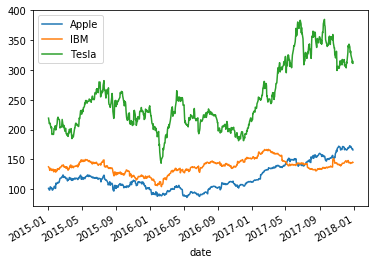

In [48]:
fig,ax = plt.subplots()
stocks.groupby('firm')['close'].plot(legend=True); 

## FRED (Federal Reserve Economic Data)

**GDP data** for the US

In [49]:
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2017,1,1)
gdp = pandas_datareader.data.DataReader('GDP', 'fred', start, end)

In [50]:
gdp.head(10)

,GDP
DATE,
2005-01-01,12761.337
2005-04-01,12910.022
2005-07-01,13142.873
2005-10-01,13332.316
2006-01-01,13603.933
2006-04-01,13749.806
2006-07-01,13867.469
2006-10-01,14037.228
2007-01-01,14208.569


By going to https://fred.stlouisfed.org, I found the employment data in the table PAYEMS

1. go to website, 
2. search for employment, 
3. click first link, 
4. table name is next to header. 

In [51]:
empl_us = pandas_datareader.data.DataReader('PAYEMS', 'fred', datetime.datetime(1939,1,1), datetime.datetime(2018,12,1))

,PAYEMS
DATE,
2007-10-01,138190
1964-09-01,58903
1967-05-01,65620
1950-12-01,46861
1958-09-01,51506
1983-06-01,90021
1968-06-01,67905
2009-02-01,133332
1954-09-01,48886


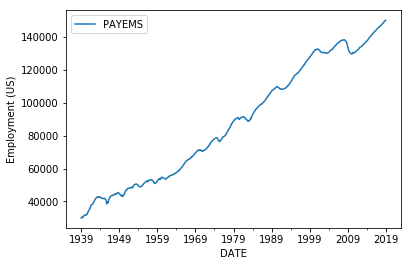

In [52]:
ax = empl_us.plot()
ax.set_ylabel('Employment (US)')
empl_us.sample(10)

## World Bank indicators: `wb`

Go to https://data.worldbank.org/indicator/ to find the indicator you care for. They will have weird names like "NY.GDP.PCAP.KD".

1. go to website 
2. search for GDP 
3. variable name ("NY.GDP.PCAP.KD") is in the URL

In [53]:
# shorthand
from pandas_datareader import wb

In [54]:
gdps_wb = wb.download(indicator='NY.GDP.PCAP.KD', country=['SE','DK','NO'], start=1990, end=2017)
gdps_wb = gdps_wb.rename(columns = {'NY.GDP.PCAP.KD':'gdp'})
gdps_wb = gdps_wb.reset_index()
gdps_wb.head(3)

,country,year,gdp
0,Denmark,2017,61582.166069
1,Denmark,2016,60670.237214
2,Denmark,2015,59967.742823


Unfortunately, it turns out that the dataframe has stored the variable year as an "object", meaning that it is a string. Country is an object because it is a string but that cannot be helped. Fortunately, gdp is a float (i.e. a number). 

**Try** not changing the datatype and see what happens in the merge later. 

In [55]:
gdps_wb.dtypes

country     object
year        object
gdp        float64
dtype: object

Let's convert year to make it an integer. 

In [56]:
gdps_wb.year = gdps_wb.year.astype(int)

In [57]:
empl_wb = wb.download(indicator='SL.EMP.TOTL.SP.ZS', country=['SE','DK','NO'], start=1990, end=2017)
empl_wb = empl_wb.rename(columns = {'SL.EMP.TOTL.SP.ZS':'employment_to_pop'})
empl_wb = empl_wb.reset_index()
empl_wb.year = empl_wb.year.astype(int)
empl_wb.head(3)

,country,year,employment_to_pop
0,Denmark,2017,59.511002
1,Denmark,2016,59.394001
2,Denmark,2015,58.196999


Now let's merge the two tables

In [58]:
wb_merged = pd.merge(gdps_wb, empl_wb, how='outer', on = ['country','year'])
print(gdps_wb.shape)
print(empl_wb.shape)
print(wb_merged.shape)
wb_merged.sample(3)

(84, 3)
(84, 3)
(84, 4)


,country,year,gdp,employment_to_pop
53,Norway,1992,63673.976492,58.189999
61,Sweden,2012,52519.680437,58.376999
9,Denmark,2008,60504.775299,63.785999


## Other data sources 

* https://www.gapminder.org/data/
* medicinpriser.dk 
* ... 

# Split-apply-combine

One of the most useful skills to learn is the split-apply-combine process. For example, we may want to compute the average employment rate within a municipality over time and calculate whether the employment rate in each year is above or below the average. We calculate this variable using a split-apply-combine procedure: 

1. **split**: divide the dataset into units (one for each municipality), 
2. **apply**: compute the average employment rate for each unit, 
3. **combine**: merge this new variable back onto the original dataset

## Groupby

The most central function to learn is 
* `df.groupby(VARS)`: returns a "groupby object", which comes born with a range of different special functions. `VARS` can be either a single variable or a list of variables. 

The logic behind a groupby object relies on there being a key ID variable that denotes a unit (e.g. a municipality, a firm, a year, ...). Groupby functions then operate within units of that variable. 

### Within-means

For example, we can compute means within groups like so: 

In [59]:
# average employment across all years of data
empl.groupby('municipality')['e'].mean().head(10)

municipality
Aabenraa       71.000000
Aalborg        69.411111
Aarhus         68.855556
Albertslund    68.400000
Allerød        81.277778
Assens         71.977778
Ballerup       72.588889
Billund        76.477778
Bornholm       67.011111
Brøndby        68.633333
Name: e, dtype: float64

In [60]:
# average employment rate within a given year 
empl.groupby('year')['e'].mean()

year
2008    76.629293
2009    73.419192
2010    72.794949
2011    72.591919
2012    72.020202
2013    72.091919
2014    72.431313
2015    72.876768
2016    73.669697
Name: e, dtype: float64

### Within-statistics

**Median** stock *volume* by firm

In [61]:
stocks.groupby('firm')['volume'].median()

firm
Apple    33710411
IBM       3707538
Tesla     4428651
Name: volume, dtype: int64

**Custom functions** can be specified by using the `lambda` notation: 
* Example: "`lambda x : 2*np.exp(x)`" is the function $f(x) = 2 \exp(x)$. 
* Example: "`lambda x : x.diff(1).mean()`" will first take a first-difference and then the mean. Note that this function can only be called on an object that has the method `diff()`, such as a `df.var`. 

In [62]:
# compute average growth 
wb_merged.groupby('country')['employment_to_pop'].apply(lambda x : x.diff(1).mean())

country
Denmark    0.061769
Norway    -0.114385
Sweden     0.195154
Name: employment_to_pop, dtype: float64

We can also **plot** statistics. Let's do a plot of the dispersion in employment rate across Danish municipalities over time: 

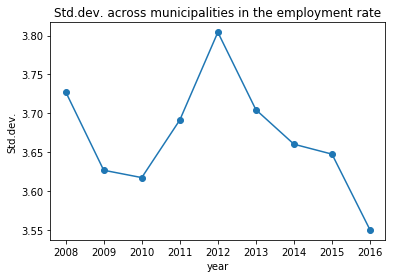

In [63]:
# inequality across municipalities in employment over time 
ax = empl.groupby('year')['e'].std().plot(style='-o');
ax.set_ylabel('Std.dev.');
ax.set_title('Std.dev. across municipalities in the employment rate');

### Groupby with date variables

If a variable in our dataframe is a datetime variable (like in `stocks`), we have access to some cool functions. We can use these properties for a datetime variable 
* `df.datevar.year`, or instead of `year`, we can specify `month`, `quarter`, `weekday`, etc. 

In `stocks` it is the index, so we just write `stocks.index.year`, e.g. 

In [64]:
# quarterly averages of the closing price 
stocks['close'].groupby([stocks.index.year, stocks.index.quarter]).mean()

date  date
2015  1       150.081395
      2       167.072113
      3       166.241158
      4       151.661339
2016  1       136.556649
      2       151.817444
      3       153.603934
      4       150.313828
2017  1       180.575326
      2       206.488994
      3       211.170331
      4       211.059352
Name: close, dtype: float64

In [65]:
# here is how we subset a "multi-index dataframe"
a = stocks['close'].groupby([stocks.index.year, stocks.index.quarter]).mean()
print(a.loc[2015,1, :]) 
print(a.index)

date  date
2015  1       150.081395
Name: close, dtype: float64
MultiIndex(levels=[[2015, 2016, 2017], [1, 2, 3, 4]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['date', 'date'])


## Split-Apply-Combine

Say we want to compute deviations between the stock price and the company's average stock price for all of our stock observations. 

### 1. Split

Create the grouped dataframe and select only the variable we need

In [66]:
stocks_grouped = stocks.groupby('firm')['close']

### 2. Apply

Call the builtin functions on the groupby object.

In [67]:
stocks_mean = stocks_grouped.mean()
print(f'stocks has shape = {stocks.shape}, stocks_mean has shape {stocks_mean.shape}')
stocks_mean.head(3)

stocks has shape = (2265, 6), stocks_mean has shape (3,)


firm
Apple    119.688427
IBM      138.335705
Tesla    251.292066
Name: close, dtype: float64

Let's change the name of this variable. 

In [68]:
stocks_mean.name = 'close_mean'

### 3. Combine

Finally, we merge the results back onto the original dataframe. Since there are many rows with each firm in `stocks` but only one row per firm in `stocks_mean`, it is a **left join**. Fortunately, `stocks_mean` already has `firm`  as the index, so we just have to change that index for `stocks`. 

In [69]:
stocks2 = stocks.reset_index().set_index('firm').join(stocks_mean, how='left')

# set index back to date
stocks2 = stocks2.reset_index().set_index('date')

# create new variable 
stocks2['close_demeaned'] = stocks2.close - stocks2.close_mean

In [70]:
stocks2.head(3)

,firm,open,high,low,close,volume,close_mean,close_demeaned
date,,,,,,,,
2015-01-02,Apple,103.4410,103.4874,99.6893,101.5280,53204626,119.688427,-18.160427
2015-01-05,Apple,100.5622,100.8965,97.8877,98.6678,64285491,119.688427,-21.020627
2015-01-06,Apple,98.9371,99.7636,97.1634,98.6771,65797116,119.688427,-21.011327


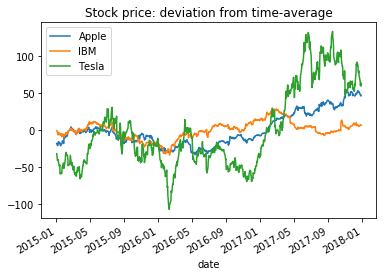

In [71]:
stocks2.groupby('firm')['close_demeaned'].plot(legend=True); 
plt.title('Stock price: deviation from time-average'); 

### Single-step split-apply-combine with `transform()`

One interesting groupby function is 
* `df.groupby()[VARIABLE].transform(STATISTIC)`: This will return a vector of the same dimension as the original variable. This means that we can directly insert the result into our dataframe, performing the *split-apply-combine* in a single step!! 

Let's do all the above in a fast way: 

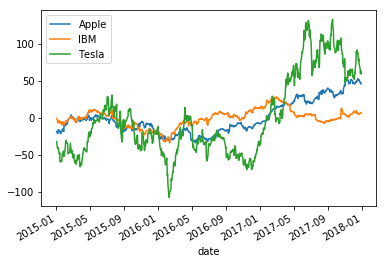

In [72]:
stocks3 = stocks.copy()

# split-apply-combine in a single step! 
stocks3['close_demeaned'] = stocks3.groupby('firm')['close'].transform(lambda x: x - x.mean())

# plot
stocks3.groupby('firm')['close_demeaned'].plot(legend=True); 

Let us normalize by the first observation. To do this, we transform with the function `lambda x: x/x[0]`, which takes every observation in the vector `x` and divides by the first element. Since the function is called inside the groupby, each vector will be the observations pertaining to that group. Note that the dataframe is sorted by date so that the first observation will be the first date.

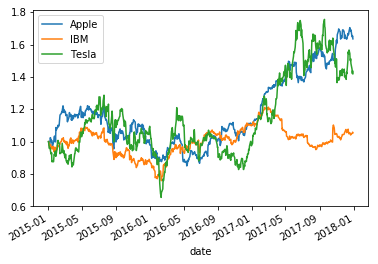

In [73]:
stocks3['close_norm'] = stocks3.groupby('firm')['close'].transform(lambda x: x/x[0])
stocks3.groupby('firm')['close_norm'].plot(legend=True);

**Another example--group by (year,month):** We can use the fact that the index has the datatype `datetime` to extract the year and the month of each. 

In [74]:
# now, we compute the mean within (year,month) and thus across all days and firm observations in each group
stocks['close_dem_monthly'] = stocks.groupby([stocks.index.year, stocks.index.month])['close'].transform(lambda x: x - x.mean())

Now we just create the new variable and plot it. 

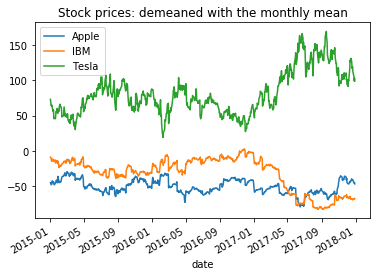

In [75]:
stocks.groupby('firm')['close_dem_monthly'].plot(legend=True); 
plt.title('Stock prices: demeaned with the monthly mean'); 

**Task:** For each municipality, compute the deviation from the country-average employment rate within each year. 